In [1]:
import pandas as pd

#from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cmlib
#from datetime import datetime as dt
#from scipy.signal import lfilter

import meassuresConstants as MC
import processData as prd
import graphFlows as gf

In [2]:
plt.rcParams['font.family'] = 'Gill Sans MT'
plt.rcParams["font.size"] = 18

In [3]:
#For PPTs
plt.rcParams["text.color"] = 'white'

In [2]:
startDate = pd.to_datetime("2022-06-19 00:00:00")
endDate = pd.to_datetime("2022-06-23 00:00:00")

## Process meassurements -----------------------------

In [4]:
#flow meter file
flowDataCsv = '../01-Data/03-FlowmeterData/01-FlowrateMeassurements.csv'

#m3/h
dfFlowsMeassured = prd.processMeassuredData(flowDataCsv, MC.FLOWS_LPS, MC.FLOWS_M3H)

#cuts the flow
dfFlowsMeassuredDWF = dfFlowsMeassured[(dfFlowsMeassured.index >= startDate)&(dfFlowsMeassured.index < endDate)]


# Show flow rate measurrement -------------------------------

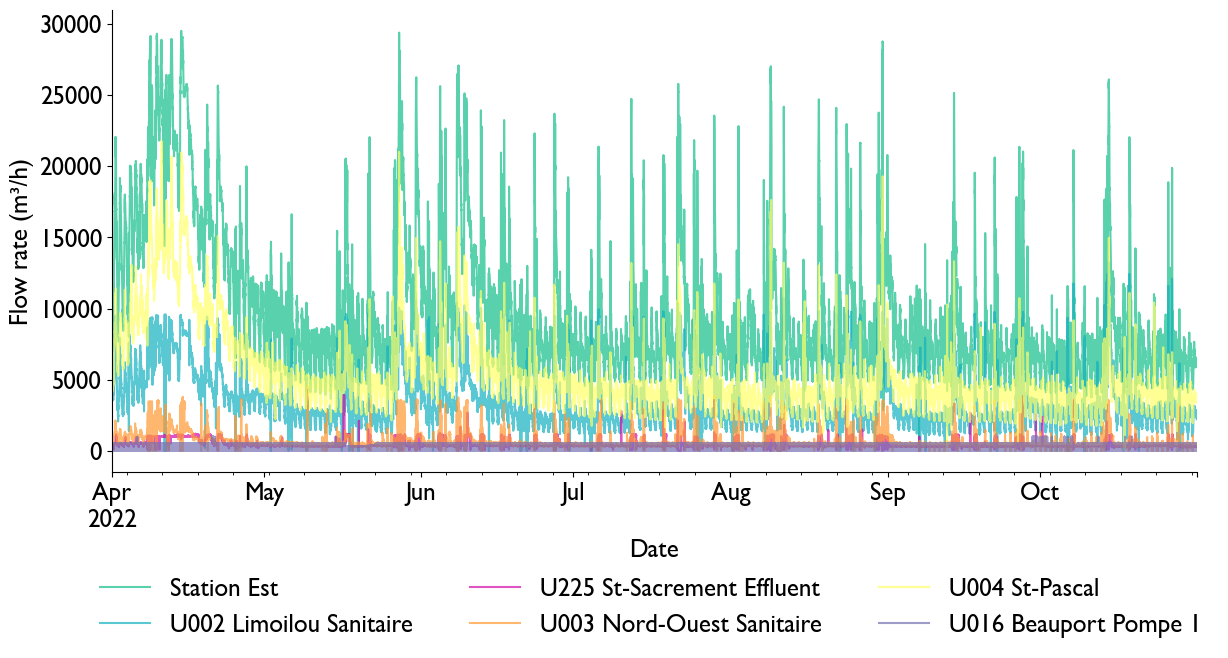

In [36]:
colorsMeassurement = ["#13BE89","#12B1BF","#D40AA8","#FF9933","#FFFF66","#7771B2"]
modelPointsts = dfFlowsMeassured[["Station Est ","U002 Limoilou Sanitaire ","U225 St-Sacrement Effluent ","U003 Nord-Ouest Sanitaire ","U004 St-Pascal ","U016 Beauport Pompe 1 "]]

ax = gf.plotTimeSeries(modelPointsts,'../02-Output/01-Graphs/'+'FlowsMeassured'+'.png',ppt=False,colorS=colorsMeassurement)

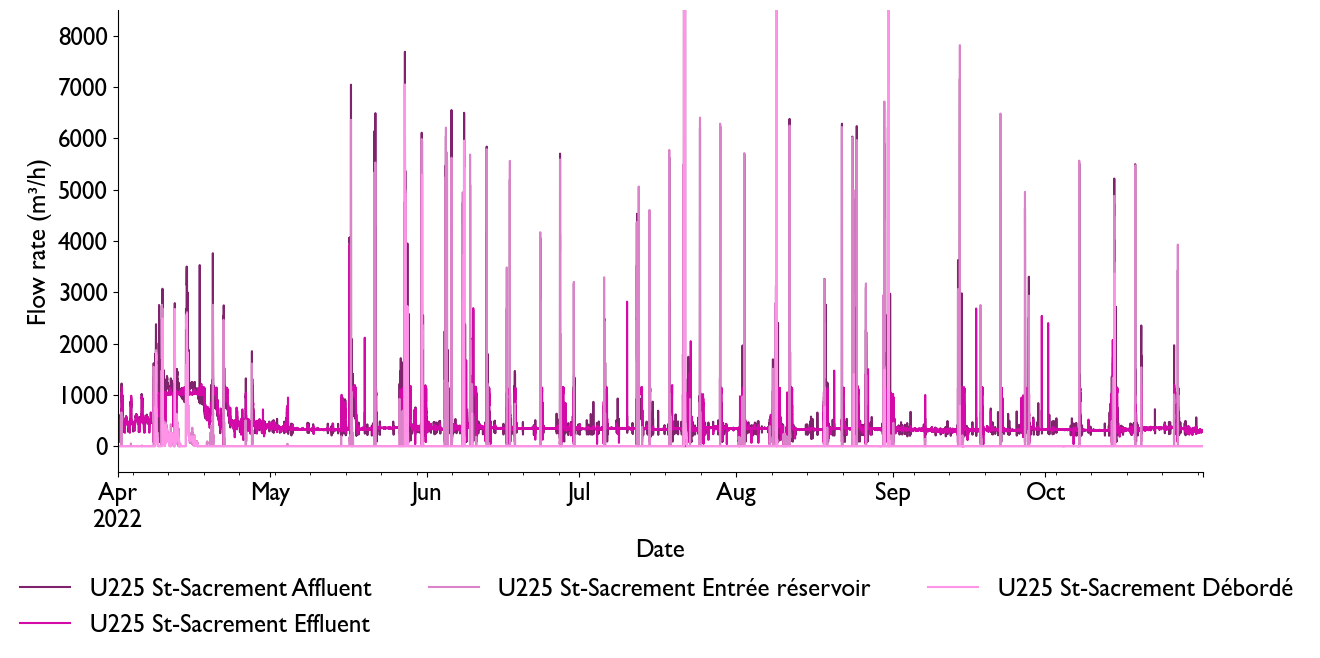

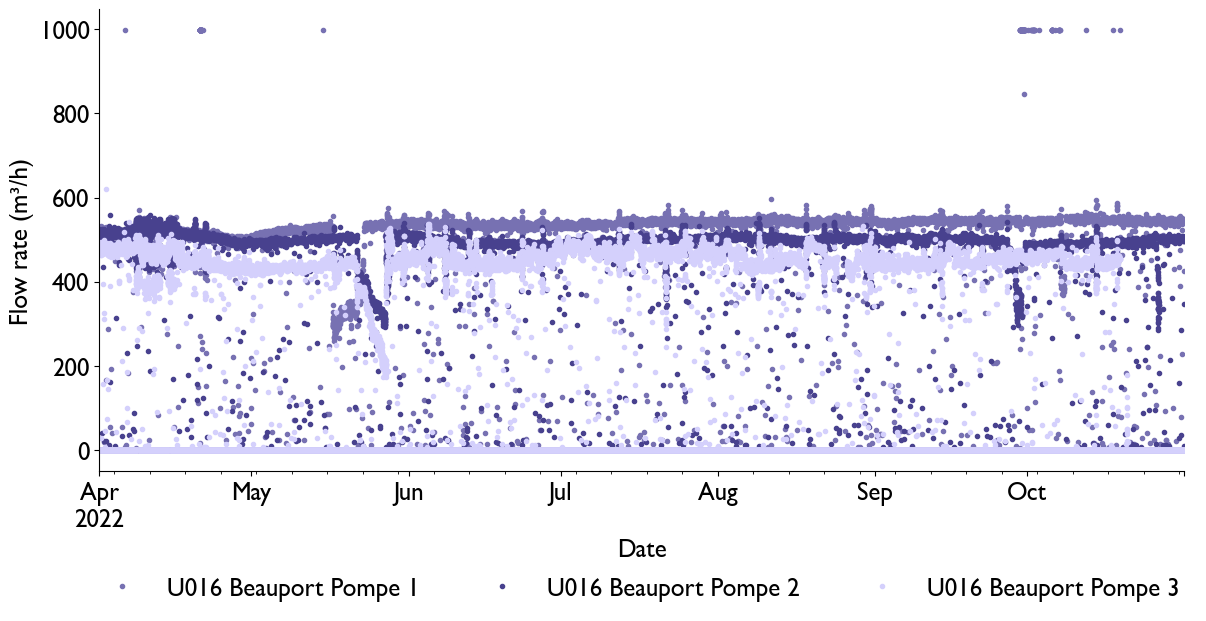

In [27]:
nordOest = dfFlowsMeassured.iloc[:, 2:4].copy()
#ax = gf.plotTimeSeries(nordOest,"nordOest",ppt=False,alpha=1,colorS=["#FFB200","#FF6600"])

limoilou = dfFlowsMeassured.iloc[:, 4:6].copy()
#ax = gf.plotTimeSeries(limoilou,"limoilou",ppt=False,alpha=1,colorS=["#96F8FF","#0D8089"])

sacrament = dfFlowsMeassured.iloc[:, 9:].copy()
ax = gf.plotTimeSeries(sacrament,"sacrament",ppt=False,alpha=1,
                       colorS=["#7F236C","#D40AA8","#DA83C8","#FF93E8"],limsY=[-500,8500])

beauport = dfFlowsMeassured.iloc[:, 6:9].copy()
ax = gf.plotTimeSeries(beauport,"beauport",ppt=False,alpha=1,colorS=["#7771B2","#48418E","#D4D0FC"],
                       points=True)


# Model data ----------------------------------------------------

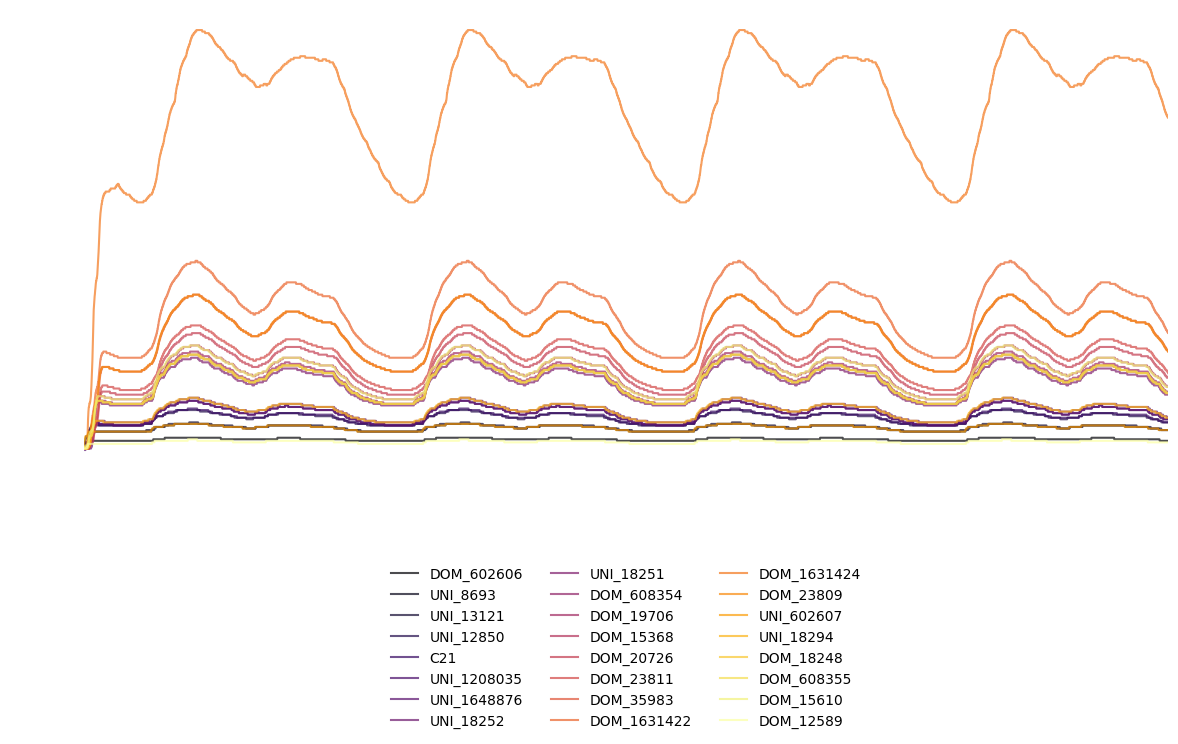

In [3]:
# values are in m3/s
flowModelDataCsv = '../01-Data/04-PCSWMMResults/02-ModelFlowsDWF2022Complete.csv' #VALUES 2022 DWF

#renameCols = {PSC.WTP: GC.WTP, PSC.STSACRA_TO_LIMOLIOU: GC.STSACRA_TO_LIMOLIOU, PSC.PASCAL:GC.PASCAL}
flowModel2022Valsm3h = prd.processSWMMOutFlowData(flowModelDataCsv, startDate, endDate)

colorSeries = [cmlib._colormaps['inferno'](x) for x in np.linspace(0, 1,flowModel2022Valsm3h.shape[1])]

ax = gf.plotTimeSeries(flowModel2022Valsm3h,'../02-Output/01-Graphs/'+'FlowsDWFSWMM'+'.png',ppt=True,colorS=colorSeries)

# WEST DATA ------------------

In [3]:
WEST_WTP_csv = '../01-Data/02-WESTResults/01-46SectionsCompleteResults.csv'

#dictRename = {WTPName:WTP_WEST+UNITS_FLOW,NO_CATCH_WEST:NO_WEST+UNITS_FLOW}

dfWEST_Results = prd.getDFWESTResults(WEST_WTP_csv,startDate,endDate)

assert prd.checkCorrectFlowWEST(dfWEST_Results), "The flows are not incrementing downstream"


# Comparisons -----

In [8]:
WESTToSWMMCOLS= [['4 (Out)','DOM_12589'],
                 ['6 (In)','UNI_8693'],
                 ['16 (Out)','UNI_13121'],
                 ['19 (Out)','UNI_12850'],
                 ['26 (Out)','C21'],
                 ['28 (Out)','UNI_1208035'],
                 ['30 (In)','UNI_18294'],
                 ['32 (In)','UNI_18251'],
                 ['33 (In)','DOM_18248'],
                 ['34 (In)','DOM_608355'],
                 ['35 (In)','DOM_15610'],
                 ['36 (In)','DOM_15368'],
                 ['41 (In)','DOM_20726'],
                 ['42 (In)','DOM_23809'],
                 ['45 (Out)','DOM_1631422'],
                 ['46 (Out)','DOM_1631424']]

In [9]:
flowModel2022Valsm3h.columns

Index(['DOM_602606', 'UNI_8693', 'UNI_13121', 'UNI_12850', 'C21',
       'UNI_1208035', 'UNI_1648876', 'UNI_18252', 'UNI_18251', 'DOM_608354',
       'DOM_19706', 'DOM_15368', 'DOM_20726', 'DOM_23811', 'DOM_35983',
       'DOM_1631422', 'DOM_1631424', 'DOM_23809', 'UNI_602607', 'UNI_18294',
       'DOM_18248', 'DOM_608355', 'DOM_15610', 'DOM_12589'],
      dtype='object')

(0.050383, 0.029803, 0.527975, 1.0) - (0.350383, 0.329803, 0.8279749999999999, 1.0)
(0.200445, 0.017902, 0.593364, 1.0) - (0.500445, 0.317902, 0.893364, 1.0)
(0.312543, 0.008239, 0.6357, 1.0) - (0.6125430000000001, 0.308239, 0.9357, 1.0)
(0.417642, 0.000564, 0.65839, 1.0) - (0.717642, 0.300564, 0.9583900000000001, 1.0)
(0.517933, 0.021563, 0.654109, 1.0) - (0.817933, 0.321563, 0.9541090000000001, 1.0)
(0.610667, 0.090204, 0.619951, 1.0) - (0.9106669999999999, 0.390204, 0.919951, 1.0)
(0.69284, 0.165141, 0.564522, 1.0) - (0.99284, 0.465141, 0.864522, 1.0)
(0.764193, 0.240396, 0.502126, 1.0) - (1.0, 0.540396, 0.8021259999999999, 1.0)
(0.826588, 0.315714, 0.441316, 1.0) - (1.0, 0.615714, 0.741316, 1.0)
(0.881443, 0.392529, 0.383229, 1.0) - (1.0, 0.692529, 0.683229, 1.0)
(0.928329, 0.472975, 0.326067, 1.0) - (1.0, 0.772975, 0.6260669999999999, 1.0)
(0.965024, 0.559118, 0.268513, 1.0) - (1.0, 0.859118, 0.568513, 1.0)
(0.98826, 0.652325, 0.211364, 1.0) - (1.0, 0.9523250000000001, 0.511363999

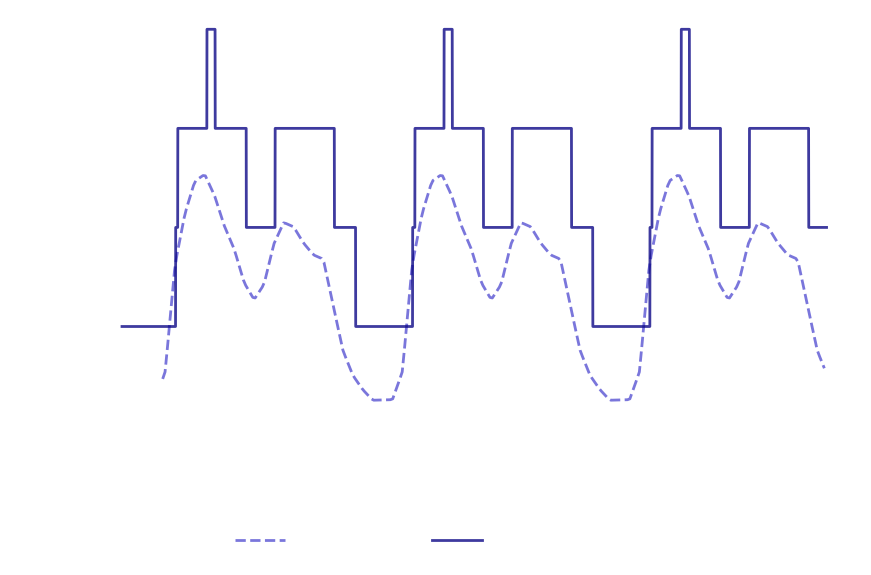

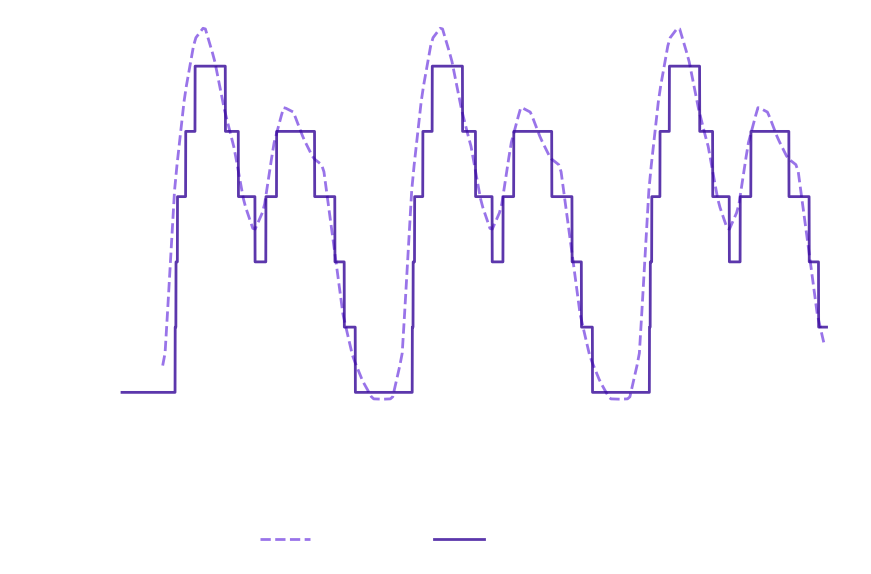

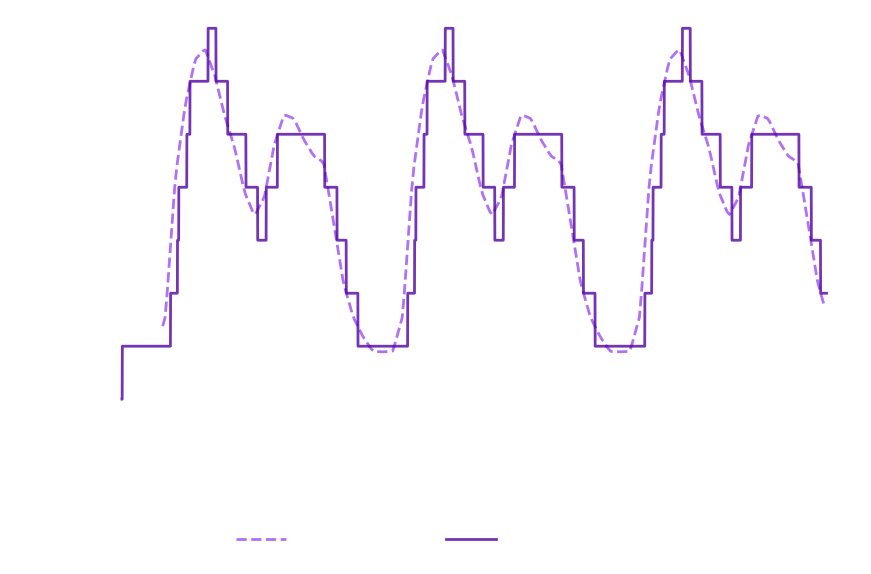

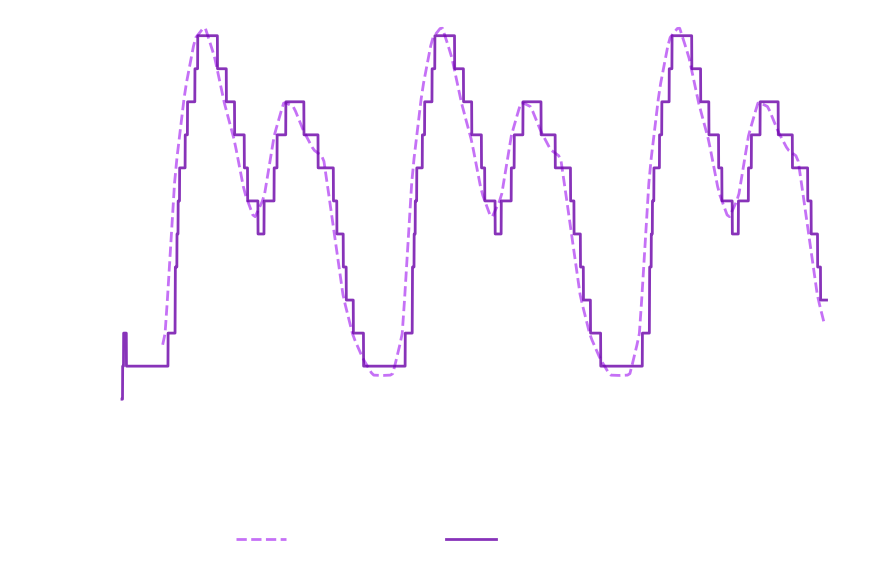

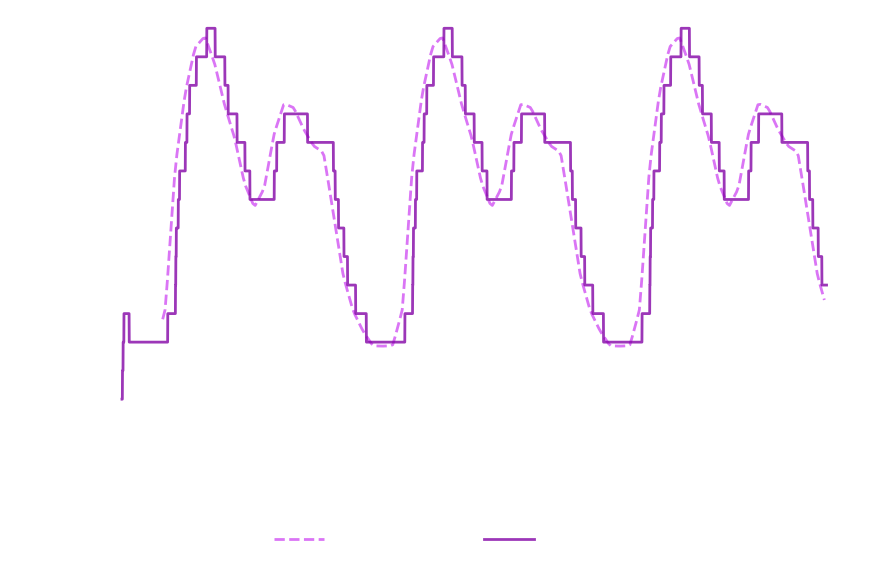

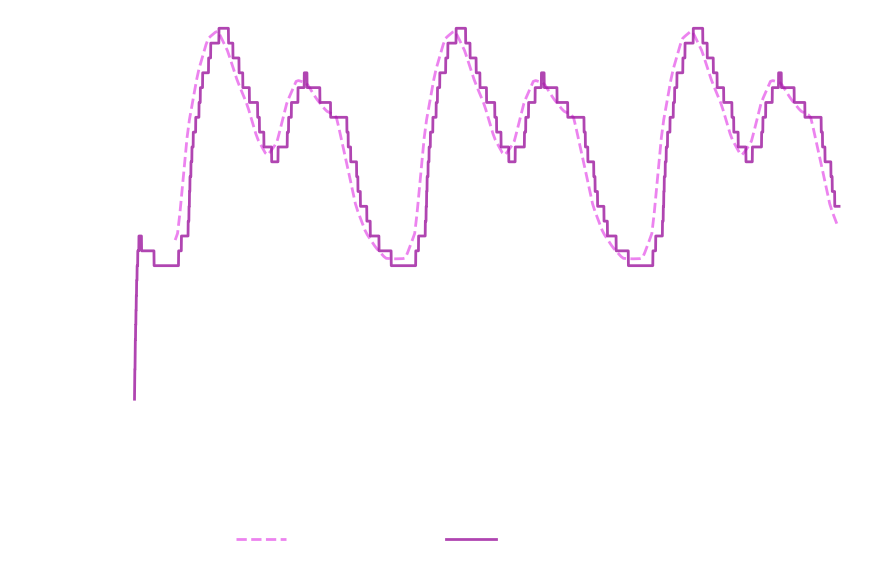

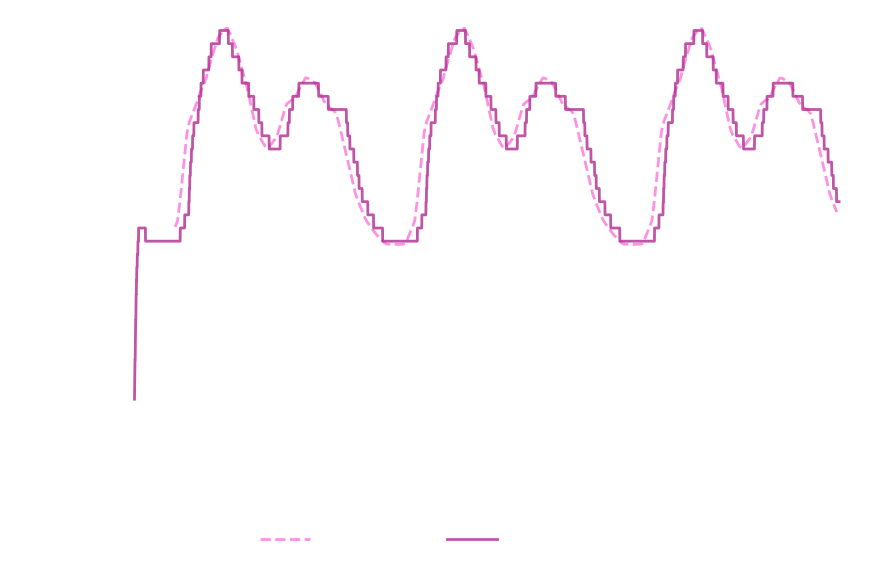

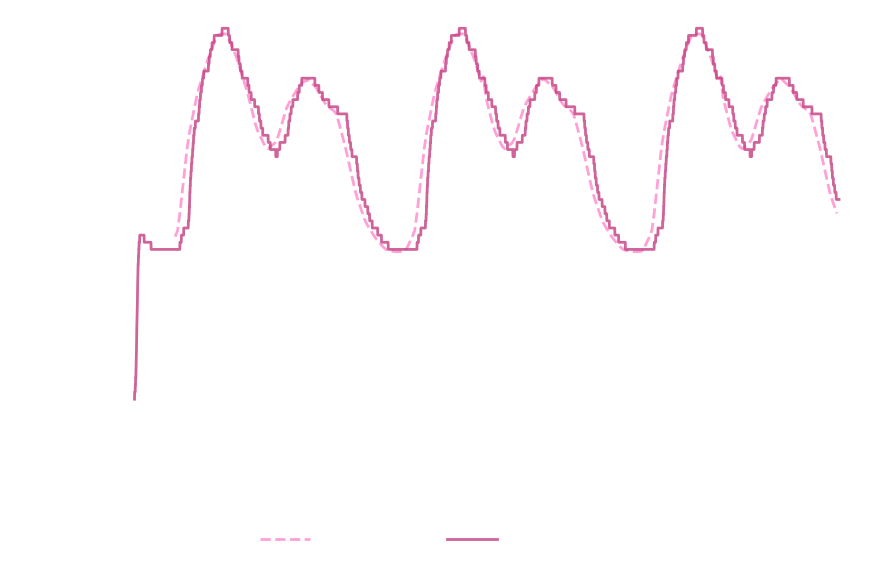

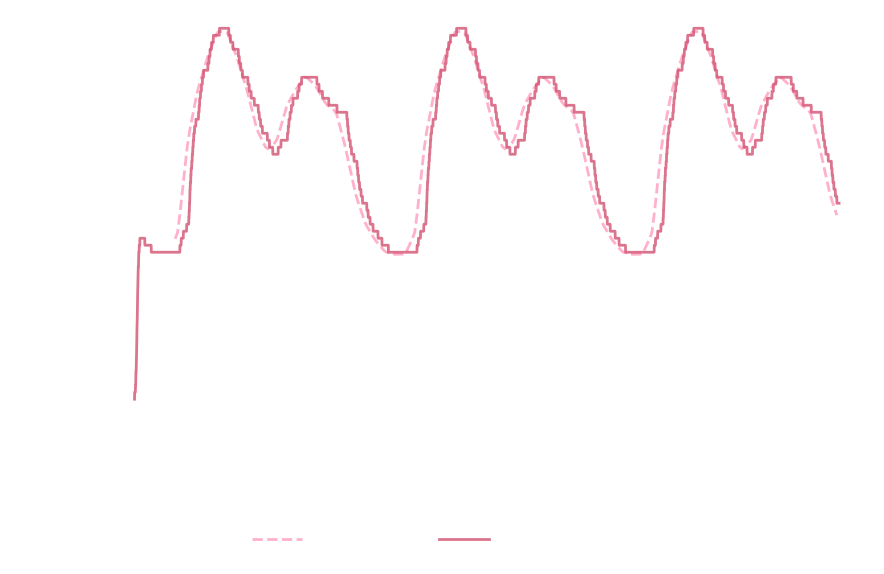

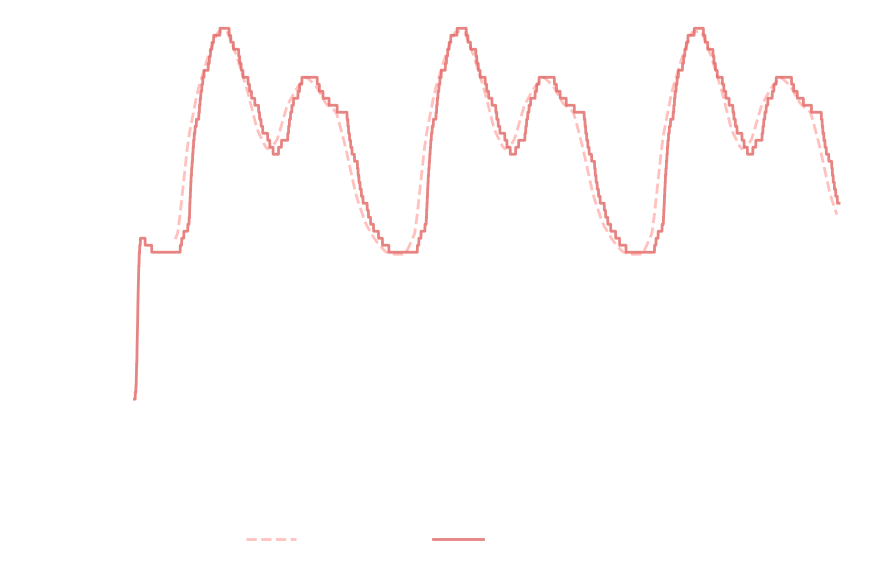

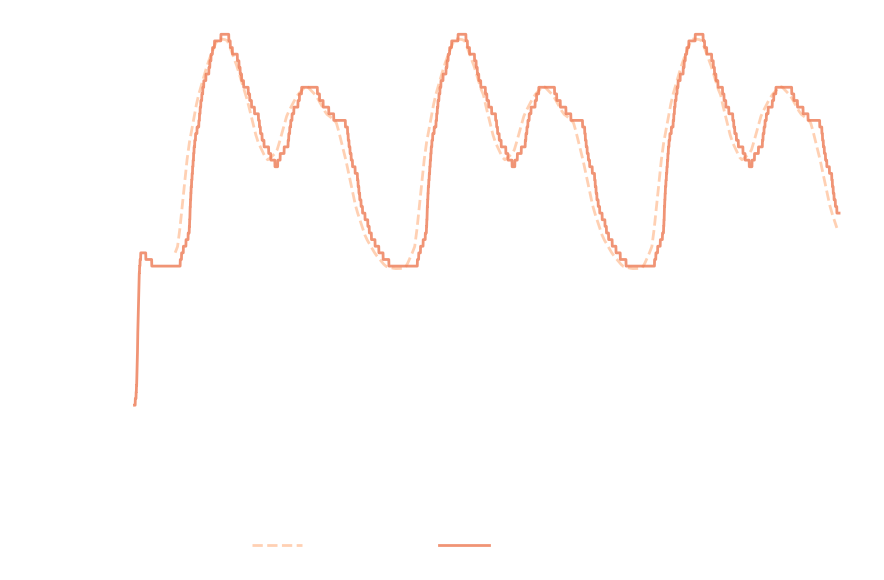

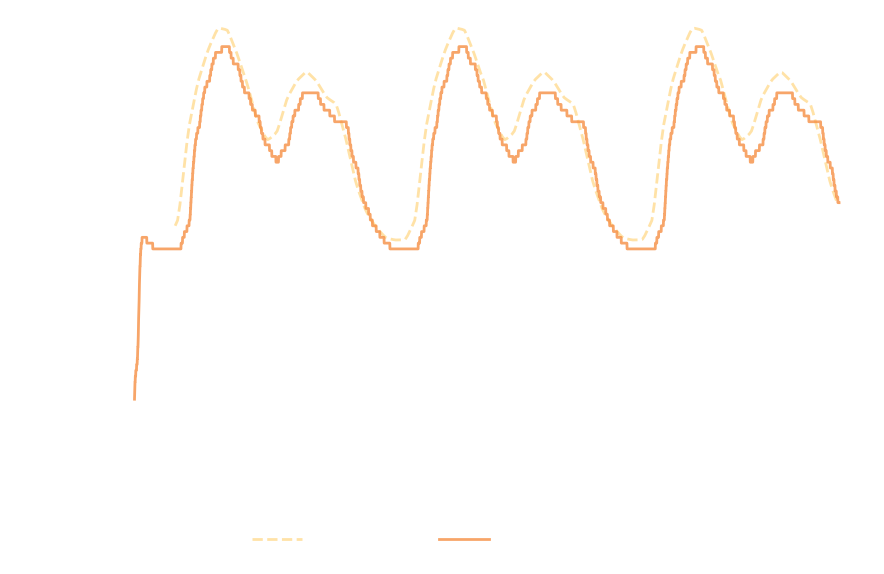

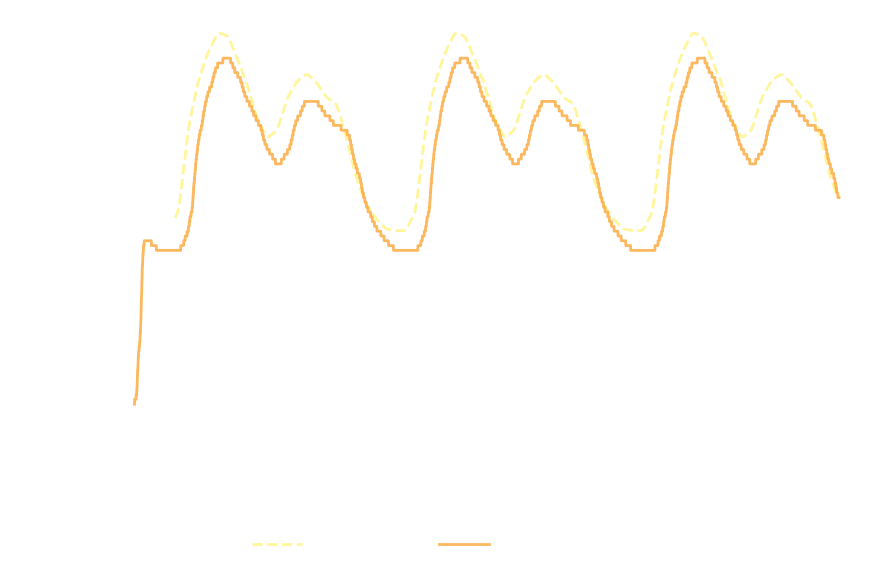

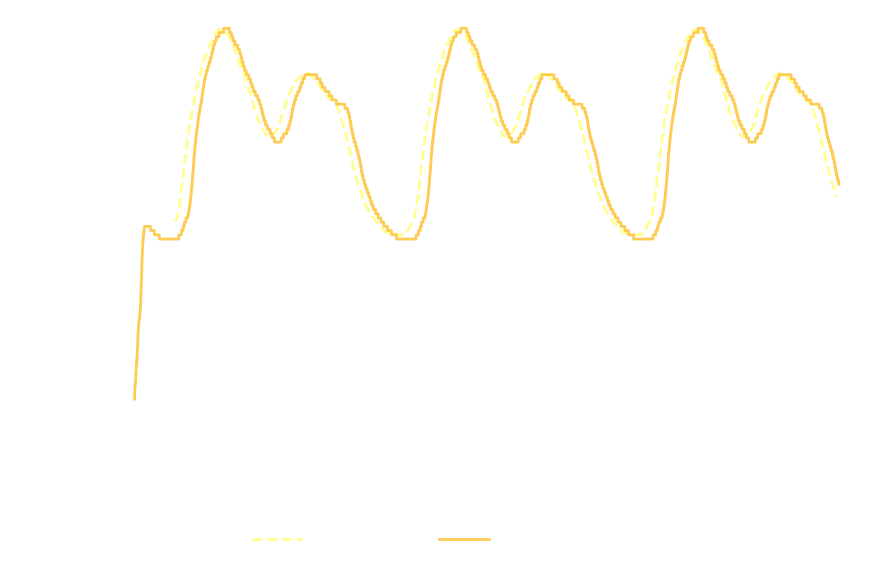

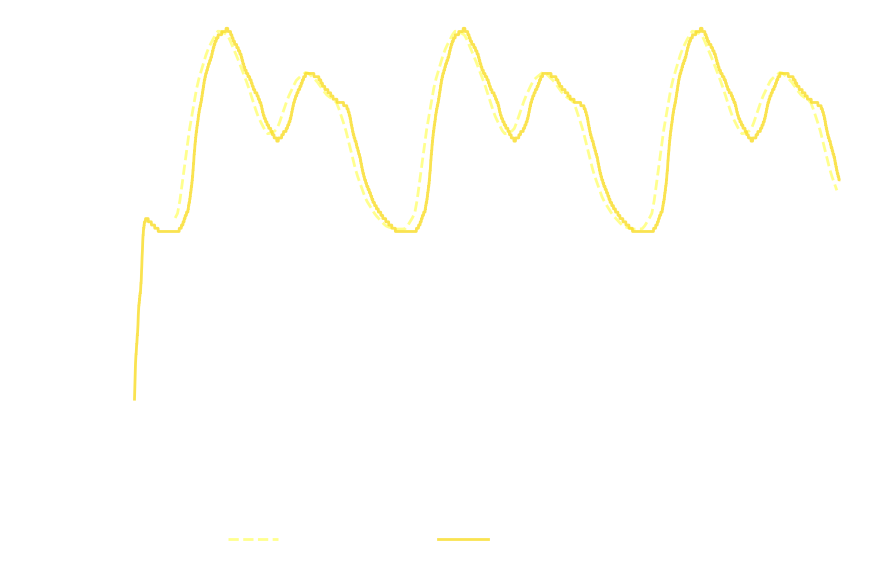

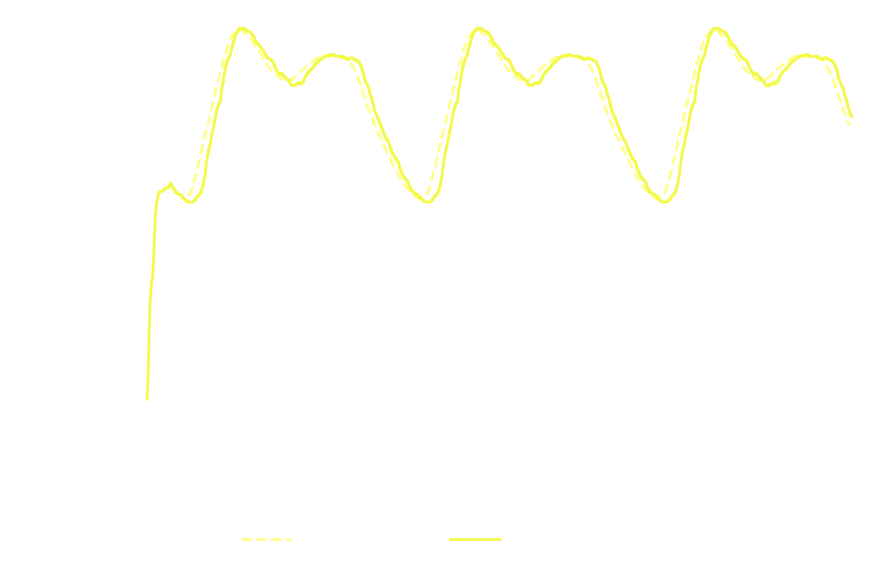

In [10]:
colorSeries = [ cmlib._colormaps['plasma'](x) for x in np.linspace(0, 1,len(WESTToSWMMCOLS))]

startDateGraph = pd.to_datetime("2022-06-19 00:40:00")

#Removes the parts that are still stabilizing before plotting
swmmDF= flowModel2022Valsm3h[flowModel2022Valsm3h.index > startDateGraph].copy()
westDF= dfWEST_Results.iloc[20:,:].copy()

for p, c in zip(WESTToSWMMCOLS,colorSeries):

    swmV = swmmDF[p[1]]
    westV = westDF[p[0]]

    file = '../02-Output/01-Graphs/' + p[0] +'.png'
    
    gf.plotComparisonsSWMM_WEST(swmV,westV,file,c)

In [11]:
STATION_EST_WEST_MANUAL = '.Well_9.Q_Out'

WEST_WTP_Manual_csv = '01-Data/04-ResultsManualOldWESTModel/05-ResultsBPWithInfiltration.csv'

dfWEST_Manual_Results = getDFWESTResults(WEST_WTP_Manual_csv,startDate,endDate,STATION_EST_WEST_MANUAL)

NameError: name 'getDFWESTResults' is not defined

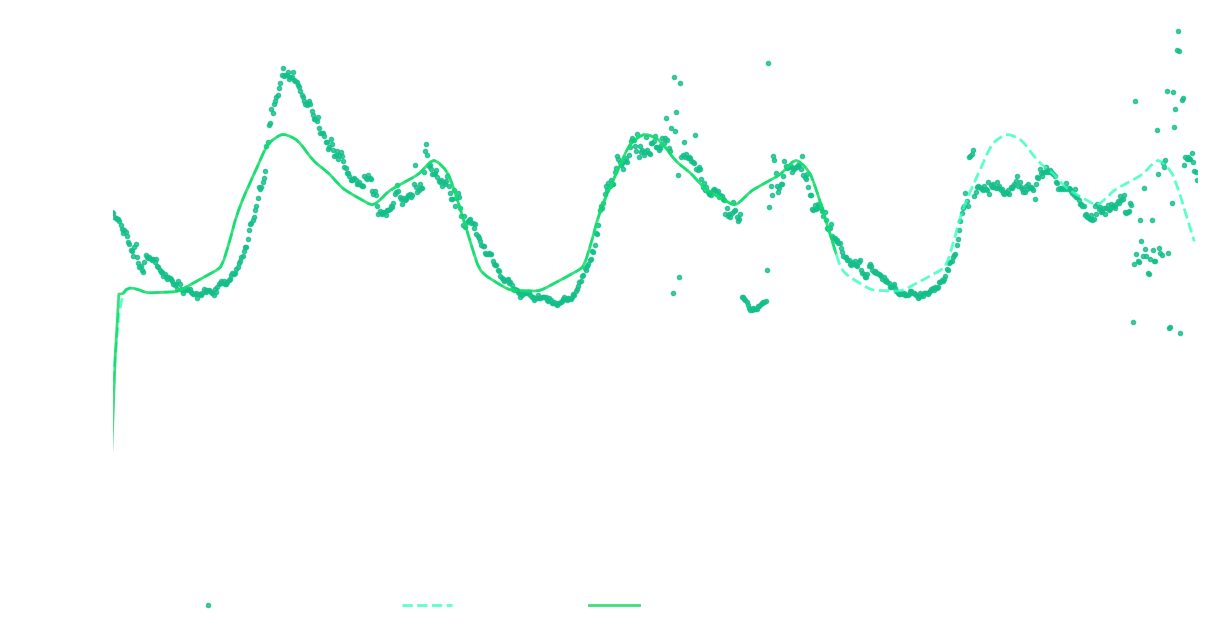

In [ ]:
measured = dfFlowsm3hDWF[[ESTA_ME]].copy()
measured.rename(columns={measured.columns[0]:"Measured"},inplace=True)

westOriginal = dfWEST_Results[[WTP_WEST+" (m3/h)"]].copy()
westOriginal.rename(columns={westOriginal.columns[0]:"Legacy"},inplace=True)

westManual = dfWEST_Manual_Results[[WTP_WEST+" (m3/h)"]].copy()
westManual.rename(columns={westManual.columns[0]:"Basic Parameters & 0.25 Infiltration"},inplace=True)

plotComparisonsWEST(measured,westOriginal,westManual,"BasicParametersInfiltra",[EST_C,EST_C2,EST_C3])

In [ ]:
STATION_EST_WEST_MANUAL = '.Qin_GC.Q_In'

WEST_WTP_OLDModified_csv = '01-Data/03-ResultsOldWESTModel(DWF)/05-WESTFlowResults(modifiedkto2).csv'

dfWEST_Manual_Results = getDFWESTResults(WEST_WTP_OLDModified_csv,startDate,endDate,STATION_EST_WEST_MANUAL)

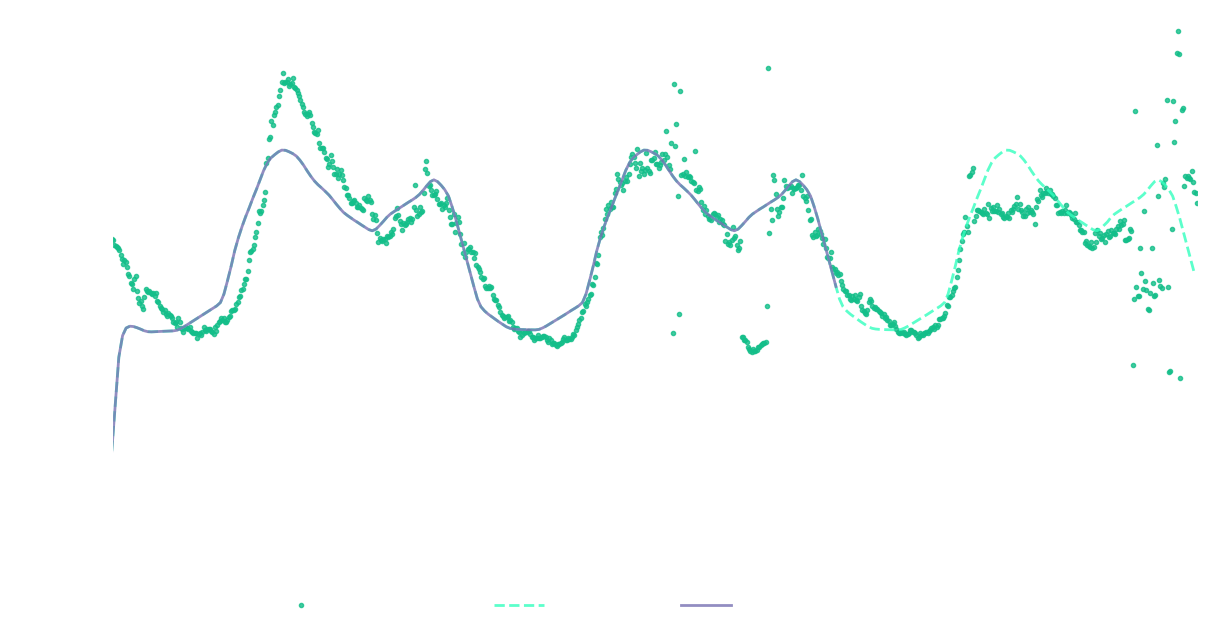

In [ ]:
measured = dfFlowsm3hDWF[[ESTA_ME]].copy()
measured.rename(columns={measured.columns[0]:"Measured"},inplace=True)

westOriginal = dfWEST_Results[[WTP_WEST+" (m3/h)"]].copy()
westOriginal.rename(columns={westOriginal.columns[0]:"Legacy"},inplace=True)

westManual = dfWEST_Manual_Results[[WTP_WEST+" (m3/h)"]].copy()
westManual.rename(columns={westManual.columns[0]:"Basic Parameters"},inplace=True)

plotComparisonsWEST(measured,westOriginal,westManual,"BasicParameters",[EST_C,EST_C2,BEAU_C])

In [6]:
WEST_WTP_csv = '../01-Data/02-WESTResults/02-OneBranch157Tanks.csv'

dfWEST_Results = prd.getDFWESTResults(WEST_WTP_csv,startDate,endDate)



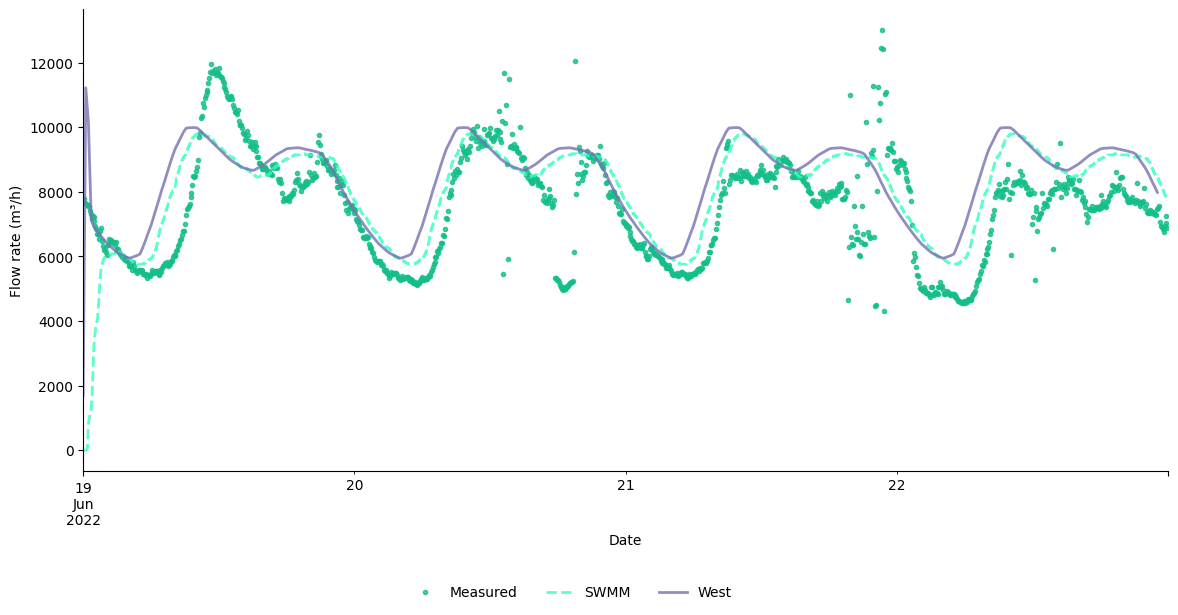

In [18]:

import PCSWMMConstants as SWMM_C
import graphConstants as G_C


measured = dfFlowsMeassuredDWF[[M_C.ESTA_ME]].copy()
measured.rename(columns={measured.columns[0]:"Measured"},inplace=True)

swmm = flowModel2022Valsm3h[[SWMM_C.WTP]].copy()
swmm.rename(columns={swmm.columns[0]:"SWMM"},inplace=True)

west = dfWEST_Results[["16 (Out)"]].copy()
west.rename(columns={west.columns[0]:"West"},inplace=True)

gf.plotComparisonsComplete(measured,swmm,west,"WEST_SWMM_MEASS",[G_C.EST_C,G_C.EST_C2,G_C.BEAU_C])

In [7]:
dfWEST_Results['a']

KeyError: 'a'